<a href="https://colab.research.google.com/github/Betsymer14/-Proyecto-DS-ParteI-Betsymer-Lugo-.ipynb-/blob/main/Copia_de_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. INTRODUCCION Y OBJETIVO

CANCER DE MAMA


  El cancer de mama es una patologia clinica que afecta a 2 de cada 10 mujeres. Segun datos actuales la mortalidad por esta afeccion viene en descenso , sin embargo, hay que mencionar que influyen muchos factores en estas cifras. Con el sigueinte proyecto se busca elaborar un modelo de Machine Learning para predicir si el estado de las pacientes (Vivo- Muerto) depende de otras condiciones medicas como:grado, estadio, edad, etapa , tamaño del tumor.

  Para el desarrollo de dicho proyecto utilizaremos un data set elegido en la web( kagle.com), fue analizado mediantes las diversas librerias que ofrece el lenguaje de programacion de PYTHON (Panda, Matplotlib, Seaborn).

  Cabe mencionar, que fueron utilizados dos Modelos de aprendizaje automatico , en primera instacias la target elegida fue los Meses de Supervivencia , debido a que es una variable numerica se considero Random Forets , sin embargo, los resultados obtenidos en las metricas de regresion fueron negativos, lo que conllevo a analizar que las feactures no eran las indicadas para predecir la Target. Para continuar, se decidio cambiar la variable de salida e introduccir nuevas variables independientes para un mejor rendimiento del modelo, ademas se utizo la cofificacion Label Encoder para trabajar todas las variables de manera numerica y se eligio un nuevo modelo REGRESION LOGISTICA DE CLASIFICACCION

  Se ha realizado un glosario de terminos que permita al lector entender el concepto de las variables y la relacion que existen entre ellas

***HIPOTESIS PLANTEADA***

*   ¿El grado, tamaño del tumor, edad, etapa, estadio influye en el estatus de los pacientes?

2. ** IMPORTACION DE LIBRERIAS**


In [1]:
from ast import Import
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from numpy import True_
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.ensemble import  RandomForestClassifier , RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix








**3. CARGAR DATOS**

In [2]:

df=pd.read_csv("https://raw.githubusercontent.com/Betsymer14/-Proyecto-DS-ParteI-Betsymer-Lugo-.ipynb-/refs/heads/main/Breast_Cancer.csv")
df




,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive;
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive;
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive;
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive;
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive;
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive;
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive;
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive;


In [3]:
df.head(2000)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive;
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive;
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive;
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive;
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,23,Positive,Negative,8,4,107,Alive;
1996,46,White,Single,T3,N1,IIIA,Moderately differentiated,2,Regional,53,Positive,Positive,22,1,68,Alive;
1997,50,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,10,Positive,Positive,2,1,78,Alive;
1998,46,White,Single,T2,N1,IIB,Poorly differentiated,3,Regional,24,Positive,Positive,4,2,89,Alive;


In [28]:
df.shape

(4024, 16)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   T Stage                 4024 non-null   float64
 4   N Stage                 4024 non-null   float64
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   int64  
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [29]:
df.isnull()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4020,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4021,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4022,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.dtypes

,0
Age,int64
Race,object
Marital Status,object
T Stage,float64
N Stage,float64
6th Stage,object
differentiate,object
Grade,int64
A Stage,object
Tumor Size,int64


In [11]:
df.loc[[277,616,618,767,1013,1061,1458,1541,1560,1716,2172,2177,2246,2411,2717,3073,3212,3248,3526], 'Grade']= 4

In [12]:
df['Grade']= pd.to_numeric(df['Grade'])

In [13]:
Le = LabelEncoder()
df['Status;'] = Le.fit_transform(df['Status;'])

In [14]:
encoder= OrdinalEncoder(categories=[['T1', 'T2', 'T3', 'T4'], ['N0', 'N1', 'N2', 'N3']])
df[['T Stage ', 'N Stage']] = encoder.fit_transform(df[['T Stage ', 'N Stage']])

In [15]:
df.head(2000)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,0.0,1.0,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,1
1,50,White,Married,1.0,2.0,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,1
2,58,White,Divorced,2.0,3.0,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,1
3,58,White,Married,0.0,1.0,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,1
4,47,White,Married,1.0,1.0,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,White,Divorced,1.0,2.0,IIIA,Moderately differentiated,2,Regional,23,Positive,Negative,8,4,107,1
1996,46,White,Single,2.0,1.0,IIIA,Moderately differentiated,2,Regional,53,Positive,Positive,22,1,68,1
1997,50,White,Married,0.0,1.0,IIA,Moderately differentiated,2,Regional,10,Positive,Positive,2,1,78,1
1998,46,White,Single,1.0,1.0,IIB,Poorly differentiated,3,Regional,24,Positive,Positive,4,2,89,1


In [20]:
df.dtypes

,0
Age,int64
Race,object
Marital Status,object
T Stage,float64
N Stage,float64
6th Stage,object
differentiate,object
Grade,int64
A Stage,object
Tumor Size,int64


In [23]:
df.tail(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
4019,62,Other,Married,0.0,1.0,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,1
4020,56,White,Divorced,1.0,2.0,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,1
4021,68,White,Married,1.0,1.0,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,1
4022,58,Black,Divorced,1.0,1.0,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,1
4023,46,White,Married,1.0,1.0,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,1


In [24]:
df.describe()

,Age,T Stage,N Stage,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,0.784791,1.438370,2.150596,30.473658,14.357107,4.158052,71.297962,1.301441
std,8.963134,0.765531,0.693479,0.638234,21.119696,8.099675,5.109331,22.921430,0.719280
min,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,0.000000,1.000000,2.000000,16.000000,9.000000,1.000000,56.000000,1.000000
50%,54.000000,1.000000,1.000000,2.000000,25.000000,14.000000,2.000000,73.000000,1.000000
75%,61.000000,1.000000,2.000000,3.000000,38.000000,19.000000,5.000000,90.000000,1.000000
max,69.000000,3.000000,3.000000,4.000000,140.000000,61.000000,46.000000,107.000000,3.000000


In [16]:
df['Status;'].value_counts()

,count
Status;,
1,3398
3,607
0,10
2,9


In [ ]:
print(df.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status;                   0
dtype: int64


# 4. HIPOTESIS

(H0) ¿El Status de los Pacientes que han padecido C.A de mama no se debe a Variables especificas ?

(H1) ¿ Sera posible aplicar un Modelo de Machine Learning que prediga el Status de las pacientes con las caracteristicas mas importantes a tomar en cuenta en el CA de mama ?

In [ ]:
X= df[['Age', 'T Stage ', 'Grade', 'Tumor Size', 'N Stage']]
y= df['Status;']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explaine_variance = pca.explained_variance_ratio_
print(explaine_variance)

[0.40613117 0.20985442 0.1917111  0.15417567 0.03812765]


<function matplotlib.pyplot.show(close=None, block=None)>

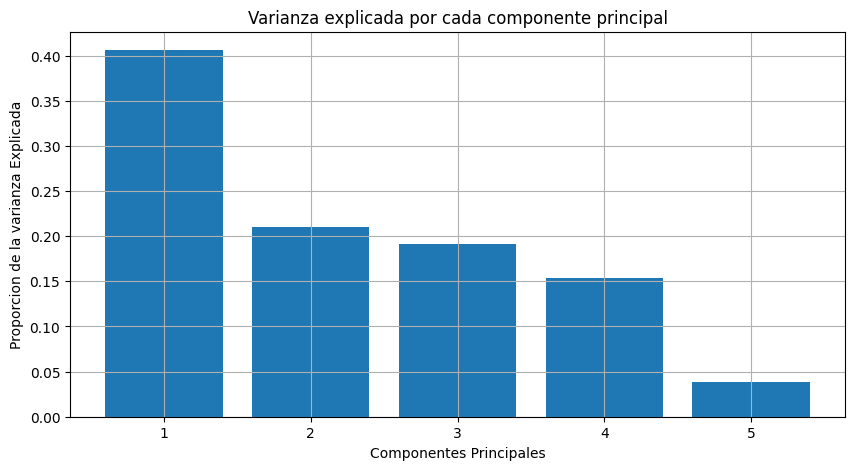

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(1, len(explaine_variance) + 1), explaine_variance)
plt.xlabel('Componentes Principales')
plt.ylabel('Proporcion de la varianza Explicada')
plt.title('Varianza explicada por cada componente principal')
plt.grid(True)
plt.show

In [ ]:
pca_df= pd.DataFrame(data=X_pca, columns=['Age', 'T Stage ', 'Grade', 'Tumor Size', 'N Stage'])

print(pca_df.head())
print("Varianza explicada:" , pca.explained_variance_ratio_)

        Age  T Stage      Grade  Tumor Size   N Stage
0 -1.549283 -0.073968  1.774877   -1.293191 -0.126307
1  0.612168 -0.102260 -0.060851    0.800601 -0.057575
2  2.718287  1.006553  0.674880    1.167749 -0.039034
3 -1.009428 -0.779886  0.990349   -1.027686  0.330688
4  0.637119 -1.259581 -0.205745   -1.020933  0.164299
Varianza explicada: [0.40613117 0.20985442 0.1917111  0.15417567 0.03812765]


# **DIVIDIR DATOS**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (3219, 5)
Dimensiones de X_test: (805, 5)
Dimensiones de y_train: (3219,)
Dimensiones de y_test: (805,)


**PREDICCION DEL** **MODELO**

In [ ]:
modelo= LogisticRegression(max_iter=10000, n_jobs=-1)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
accuraccy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuraccy)

Accuracy: 0.8521739130434782


In [ ]:
cf_matriz = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cf_matriz)


Matriz de Confusión:
[[  0   0   0   0]
 [  0 681   0   4]
 [  2   0   1   0]
 [  0 113   0   4]]


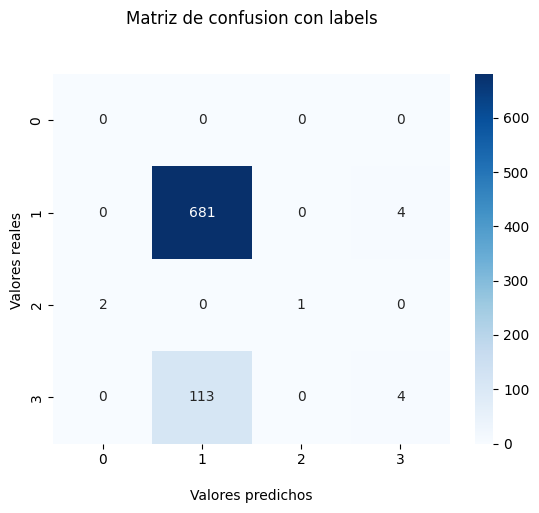

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g') # fmt='g' for general number formatting
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');

labels = modelo.classes_

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

 **DESCRIPCION DE VARIABLES**

 Grade(Numerica)

 Survival Months(Numerica)

 Regional Node (Numerica)

 Age( Numerica)

**ANALISIS EXPLORATORIO DE DATOS**



 **ANALISIS BIVARIADO**


VARIABLES : Grade  ; Survival Months

/tmp/ipython-input-1895530279.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Grade', y='Survival Months', ci='sd', palette='pink')
/tmp/ipython-input-1895530279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Grade', y='Survival Months', ci='sd', palette='pink')


<function matplotlib.pyplot.show(close=None, block=None)>

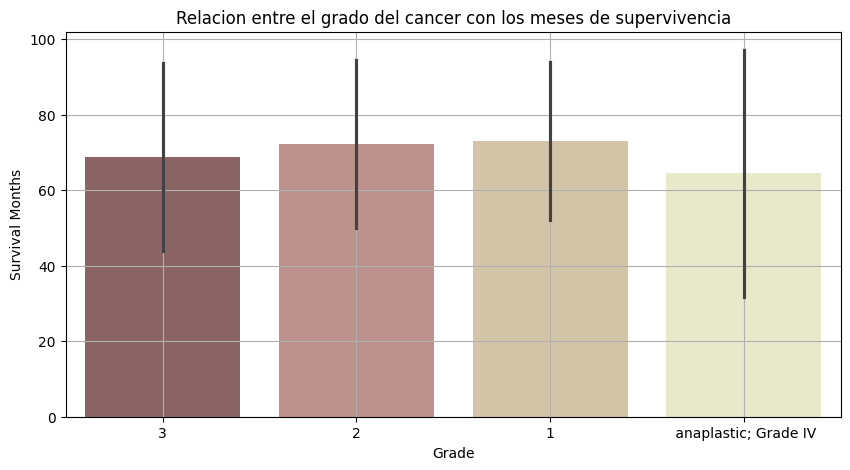

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Grade', y='Survival Months', ci='sd', palette='pink')
plt.xlabel('Grade')
plt.ylabel('Survival Months')
plt.title('Relacion entre el grado del cancer con los meses de supervivencia')
plt.grid(True)
plt.show

**ANALISIS MULTIVARIADO**

VARIABLES : Edad , Grado del Tumor, Meses de Supervivencia

<function matplotlib.pyplot.show(close=None, block=None)>

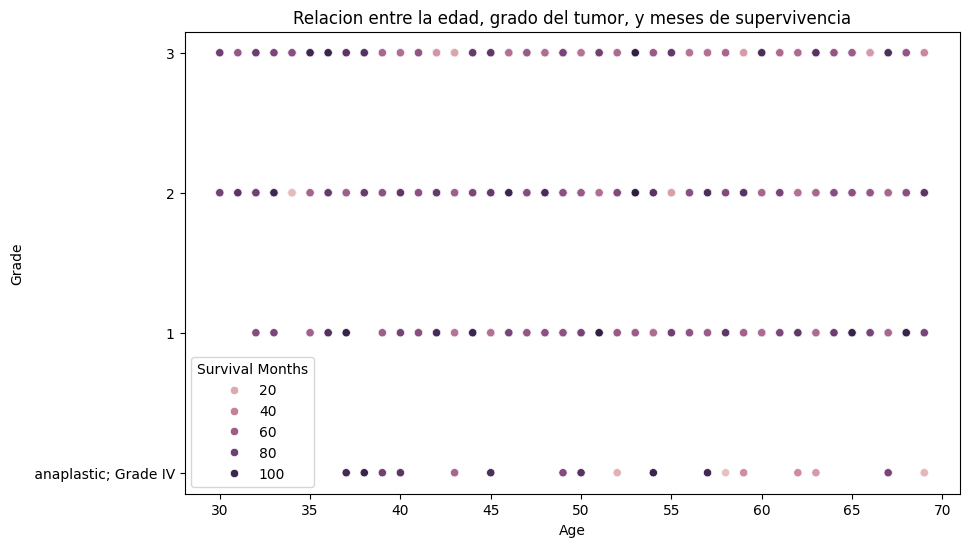

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Grade', hue='Survival Months')
plt.title('Relacion entre la edad, grado del tumor, y meses de supervivencia')
plt.show

**ANALISI MULTIVARIADO**

VARIABLES: NODULOS POSITIVOS, GRADO Y ESTADO DEL PACIENTE

<function matplotlib.pyplot.show(close=None, block=None)>

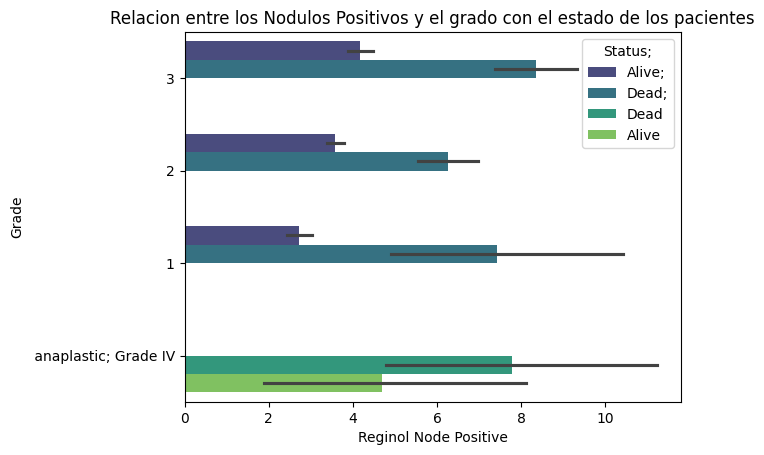

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("https://raw.githubusercontent.com/Betsymer14/-Proyecto-DS-ParteI-Betsymer-Lugo-.ipynb-/refs/heads/main/Breast_Cancer.csv")
df
sns.barplot(x='Reginol Node Positive', y='Grade', hue='Status;', data= df, palette='viridis')
plt.title("Relacion entre los Nodulos Positivos y el grado con el estado de los pacientes")
plt.show




**                        CONCLUSIONES**

 Utilizando un grafico de barras (barplot) para dar respuesta a la primera hipotesis planteada ; relacion entre los meses de supervivencia con el grado del cancer, se puede interpretar de manera clara que mientras mayor sea el grado del cancer menos meses de supervivencia tienen las pacientes, otra variable que influye en esta situacion es la edad . A traves de un grafico de dispersion de puntos o scatter plot, se pudo correlaccionar las 3 variables demostrando asi, que las pacientes con edades comprendida entre los 50 y 70 años tienen menos meses de supervivencia.

 Otra factor que influye en el estado de vida de las pacientes son los Nodulos Positivos, ya que, se pudo analizar que el grado mas avanzado y un promedio de 6 a 8 nodulos positivos son los factores que mas influyen en la muerte de las pacientes

 Para la continuacion de esta actividad es necesario relacionar todas estas variables juntas: Edad, nodulos positivos, grado del cancer , estado de vida, para tener informacion precisa que ayude a entender esta enfermedad.

 Cabe mencionar que los graficos elegidos para el analisis se tomaron en cuenta de acuerdo al tipo de variable, para este caso todas fueron del tipo numericas.

 Finalizando se puede concluir mediante los anilisis bivariados y multivariados que las hipotesis planteadas son reales (H1).



                    **GLOSARIO DE TERMINOS**



*   **Age**: Edad

*   **Race:** Raza

*   **Marital Status:** Estado Civil

*   **T Stage:** hace referencia al tamaño del tumor primario y si se ha propagado a tejidos cercanos, como la piel o la pared torácica. Un número de T más alto, como T1, T2, T3 o T4, indica un tumor más grande o una invasión más extensa de los tejidos circundantes.

*   **N Stage:** La "N" en la estadificación del cáncer, parte del sistema TNM, indica si el cáncer se ha propagado a los ganglios linfáticos cercanos. Un valor de N0 significa que no hay propagación a los ganglios linfáticos, mientras que N1, N2 o N3 indican que el cáncer se ha diseminado en diferentes grados, dependiendo de la cantidad, tamaño y ubicación de los ganglios afectados.

*   **differentiate:** En el cáncer de mama, la diferencia principal entre diferenciado e indiferenciado se basa en qué tan parecido es el aspecto de las células cancerosas al de las células normales bajo el microscopio, lo que afecta la agresividad y el pronóstico del tumor. Un tumor bien diferenciado


*   **Grade (Grado): ** se refiere a la apariencia de las células cancerosas bajo el microscopio y la velocidad con la que crecen

*   **A Stage (estadio):** en el cáncer de mama se refiere a una clasificación que describe qué tan avanzado está el cáncer, incluyendo su tamaño, si ha invadido tejidos cercanos y si se ha diseminado a otras partes del cuerpo. Esta información es crucial para determinar el pronóstico y planificar el tratamiento más adecuado. Los estadios van desde el 0 (precanceroso, no invasivo) hasta el IV (avanzado o metastásico, diseminado a órganos distantes).


*  **Tumor Size:** Tamaño del tumor (mm)

*  **Estrogen Status (Estado de estrógeno):** se refiere a si las células cancerosas tienen receptores de estrógeno, lo que significa que el estrógeno puede hacer que crezcan

**Progesterone Status (Estado de Progesterona):** se refiere a la presencia o ausencia de receptores de progesterona en las células cancerosas, lo que determina si el tumor es sensible a esta hormona


*   **Regional Node Examined	Reginol Node (Nódulo regional examinado):** en el contexto del cáncer de mama generalmente se refiere a un ganglio linfático cercano que ha sido extirpado y analizado para determinar si contiene células cancerosas. Significa que el cáncer puede haberse propagado más allá del seno a los ganglios linfáticos de la axila, la clavícula o el cuello.


*  ** Reginol Node Positive** Los resultados numericos indican la cantidad de ganglios linfaticos positivos ejemplo: Un resultado de 8 ganglios linfáticos regionales positivos en cáncer de mama significa que se extirpó un total de 8 ganglios linfáticos y en todos ellos se encontraron células cancerosas.


*   **Survival Months:** Meses de Supervivencia

*   **Status;**: Estado (Vivo o Muerto)










---







